# TP0

## Integrantes
- Arian
- Ariel
- Juan Felipe
- Juan Luis Barberia

In [38]:
# Add ".."" to path to find the src module
import os
import sys
sys.path.append("..")

# import packages
from itertools import product
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Constantes
POKEMONES = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
POKEBOLAS = ["pokeball", "ultraball", "fastball", "heavyball"]

pokemon_factory = PokemonFactory("../pokemon.json")

## 1.A.

Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?




Probabilidad de Captura promedio por pokebola
---------------------------------------------
pokebola  pokeball  ultraball  fastball  heavyball
pokemon                                           
caterpie      0.36       0.62      0.34       0.30
jolteon       0.05       0.09      0.30       0.07
mewtwo        0.00       0.00      0.02       0.00
onix          0.04       0.11      0.06       0.12
snorlax       0.05       0.14      0.03       0.07


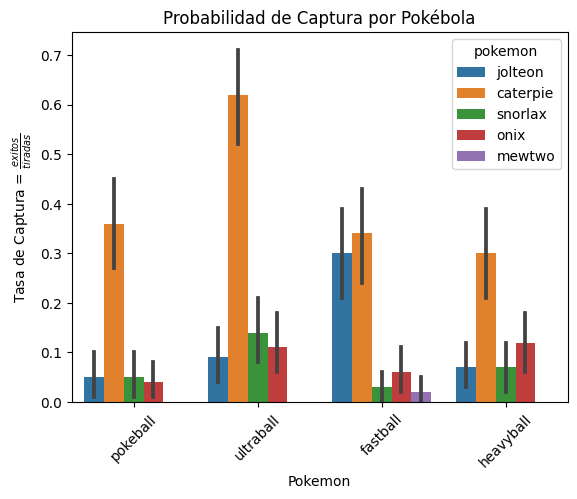

In [115]:
hp = 1.0
lvl = 1.0

results = []
for pokemon_name, pokebola in product(POKEMONES, POKEBOLAS):
    for _ in range(100):
        pokemon = pokemon_factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        attempt_success, capture_rate = attempt_catch(pokemon, pokebola, noise=0.1)
        results.append({
            "pokemon": pokemon.name,
            "pokebola": pokebola,
            "attempt_success": attempt_success,
            "capture_rate": capture_rate,
        })

df_results = pd.DataFrame(results)
results_per_pokemon = df_results.pivot_table(index="pokemon", columns="pokebola",
                                              values="attempt_success", aggfunc="mean")
print("Probabilidad de Captura promedio por pokebola")
print("---------------------------------------------")
print(results_per_pokemon[POKEBOLAS])

sns.barplot(x="pokebola", y="attempt_success", hue="pokemon",
            data=df_results, errorbar="ci")

plt.xlabel("Pokemon")
plt.ylabel("Tasa de Captura = $\\frac{exitos}{tiradas}$")
plt.title("Probabilidad de Captura por Pokébola")
plt.xticks(rotation=45)
plt.show()

## 1.B.

¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justiﬁcar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

A partir del gráfico podemos ver que cada pokebola posee distinta efectividad con respecto a las otras para cada uno de los pokemones y eso depende de las 
caracteristicas intrínsecas del pokemon

## 2.A.

¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cual es más o menos efectiva?

## 2.B.

¿Cómo afectan los puntos de vida a la efectividad de la captura?

Sugerencia: Elegir uno o dos Pokémon y, manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos % de HP.

## 2.C.

¿Qué parámetros son los que más afectan la probabilidad de captura?

## 2.D.

Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

## 2.E.

A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?